<p><a href="https://www.asu.edu.eg/"><img align="right" src="https://ums.asu.edu.eg/images/logo.png" width="100" /></a></p>
<div style="font-family:Georgia;color:black;font-size:120%;text-align:left;">
<h1 style="color: blue";>
  Marbert for Arabic Emotion Detection
</h1>
    <h6>
        Information Systems Department
    </h6>
    <h6>
        <b>
        Under supervision of Dr.  Shimaa Haridy
        <br>
        &copy; 2024 Graduation Project team
    </h6>
    <br>
<br>
</div>

<p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:150%;text-align:center;border-radius:20px 40px;">Table Of Contents</p>   
    
* [1. Mounting Google Drive in Colab](#1)

* [2. Importing Modules](#2)
    
* [3. Loading and Exploring our Dataset](#3)
    
* [4. Data Augmentation](#4)

* [5. Model Creation and Training](#5)
      
* [6. Model Visualization](#6)

* [7. Prediction](#7)


<a id="1"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Mounting Google Drive in Colab</p>

This code segment is used to mount Google Drive in a Google Colab notebook environment. It allows you to access files and directories stored in your Google Drive directly from within the notebook.

In [3]:
from google.colab import drive
drive.mount('Arabic-Sentiment-Analysis')

Mounted at Arabic-Sentiment-Analysis


<a id="2"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Importing Modules</p>

In [4]:
# install necessary libraries

!pip install transformers
!pip install torch==6.0
!pip install datasets

from IPython.display import clear_output
clear_output()

import datasets
from datasets import load_dataset
import pandas as pd
import re
import string
import sys
import argparse
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

# import a model from huggingface
from transformers import BertTokenizer

from sklearn.model_selection import train_test_split

#### Copying and Importing Custom Stopwords Module

This code segment copies a custom stopwords module from a specified directory and imports it into the current notebook environment.

In [5]:
!cp /content/stopwords.py .
sys.path.append('.')
from stopwords import stop_words_ar

cp: '/content/stopwords.py' and './stopwords.py' are the same file


<a id="3"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Loading and Exploring our Dataset </p>

In [6]:
dataset = load_dataset('emotone_ar')
df = dataset['train'].to_pandas()
df

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/10065 [00:00<?, ? examples/s]

,tweet,label
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,0
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,1
2,كتنا نيله ف حظنا الهباب xD,3
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,2
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,0
...,...,...
10060,2222: يلا يا جماعه حفله عمرو دياب خلصت نريح شو...,3
10061,Mohamed5: اييييه دااا 😲😲 اوزيييل❤,6
10062,عملتلها ريتويت بمناسبه ساره بتاعه الاوليمبياد 😃,0
10063,وعليك قبلنا يانجم النجوم ياعندليب الحب والاحساس,2


In [7]:
df.label.value_counts()

0    1550
1    1444
2    1281
3    1256
4    1220
7    1207
5    1062
6    1045
Name: label, dtype: int64

### Mapping_labels
{0:'none',
1:'anger' ,
2:'joy',
3:'sadness',
4:'love' ,
5:'sympathy',
6:'surprise',
7:'fear'}

<a id="4"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Data Preprocessing</p>

## Initializing Variables and Lists, Defining Functions

This code segment initializes variables and lists needed for text processing, and defines functions to clean text data in Arabic.

### Variables and Lists:

- `arabic_punctuations`: A string containing Arabic punctuations.
- `english_punctuations`: A string containing English punctuations.
- `punctuations_list`: A combined list of Arabic and English punctuations.
- `arabic_diacritics`: A compiled regular expression pattern to match Arabic diacritics.

### Functions:

#### `clean_text(text)`:
This function performs various text cleaning operations including:
1. Removing emails.
2. Removing URLs.
3. Removing mentions.
4. Converting hashtags to words.
5. Removing stopwords.
6. Removing newlines.
7. Removing repeating characters.
8. Replacing emojis.

#### `normalize_arabic(text)`:
This function normalizes Arabic characters by replacing certain characters with their base form.

#### `remove_digits(word_list)`:
This function removes digits from a list of words.

#### `remove_diacritics(text)`:
This function removes Arabic diacritics from the text.

#### `remove_punctuations(text)`:
This function removes punctuations from the text.

#### `remove_repeating_char(text)`:
This function removes repeating characters from the text.

#### `remove_newlines(text)`:
This function replaces newline characters with a dot.

#### `read_stop_words()`:
This function reads a list of Arabic stopwords.

#### `remove_english_characters(text)`:
This function removes English characters from the text.

#### `remove_stop_words(text)`:
This function removes Arabic stopwords from the text.

#### `remove_URLs(text)`:
This function removes URLs from the text.

#### `remove_emails(text)`:
This function removes emails from the text.

#### `remove_mentions(text)`:
This function removes mentions from the text.

#### `hashtags_to_words(text)`:
This function converts hashtags to words.

#### `replace_emojis(text)`:
This function replaces emojis with corresponding words.

### Usage:
These variables and functions would be used to preprocess text data in Arabic, removing noise and preparing it for further analysis or modeling.


In [8]:
############### initial variables and lists ##################



arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

arabic_handles = \
    [
        ('ه', ['ة']),\
        ('ي', ['ى']),\
        ('ا', ['أ','إ','آ']),\
        # ('و', ['ؤ']),\
        ('', ['ّ','‘','ٌ','ُ','ً','َ','ِ','ٍ','ـ','’','ْ','~'])
    ]

############### functions ##################
def clean_text(text):
    """
    It includes these functions:
        1-remove_emails
        2-remove_URLs
        3-remove_mentions
        4-hashtags_to_words
        5-remove_punctuationsb
        6-normalize_arabic
        7-remove_diacritics
        8-remove_repeating_char
        9- remove newlines
        10-remove_stop_words
        11-remove_emojis
        12-remove_english_characters
        13-remove_digits
    """

    text=remove_emails(text)
    text=remove_URLs(text)
    text=remove_mentions(text)
    text= hashtags_to_words(text)

    # Fihom moshkla
    # text=remove_punctuations(text)
    # text=normalize_arabic(text)
    # text=remove_diacritics(text)
    # text=remove_english_characters(text)
    # text=remove_digits(text)

    text=remove_stop_words(text)
    text= remove_newlines(text)
    text=remove_repeating_char(text)
    text=replace_emojis(text)

    return text


def normalize_arabic(text):
    """ normalize the arabic character  ."""
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text


def remove_digits(word_list):
    # Remove digits
    filtered_words = ''.join([w for w in word_list if not w.isdigit()])
    return filtered_words

def remove_diacritics(text):
    """ remove the `arabic diacritics` from the `text` ."""
    text = re.sub(arabic_diacritics, '', text)
    return text


def remove_punctuations(text):
    """ remove the `punctuations` from the `text` ."""
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


def remove_repeating_char(text):
    """ remove the `repeating character` from the `text` ."""
    return re.sub(r'(.)\1+', r'\1', text)

def remove_newlines(text):
  text = re.sub('\n'," . ",text)
  return text

def read_stop_words():
    """ read the `stopwords` """
    stop_words = stop_words_ar.split('\n')
    #unify arabic letters
    for key, arr in arabic_handles:
        for a in arr:
            stop_words = [word.replace(a, key) for word in stop_words]
    return stop_words

def remove_english_characters(text):
    # Define a regular expression pattern to match English characters
    english_pattern = re.compile("[a-zA-Z]")

    # Use sub to replace English characters with an empty string
    cleaned_text = english_pattern.sub('', text)

    return cleaned_text

def remove_stop_words(text):
    """ remove the `list of Arabic stopwords` from the `text` ."""
    stop_words = read_stop_words()
    lines = text.splitlines()
    new_lines = []
    for line in lines:
        if line.strip():  #if not empty
            words = line.split()
            for w in range(0, len(words)):
                word = words[w]
                if word in stop_words:
                    words[w] = ""
            line = " ".join(words)
            line = line.replace("  "," ")
            new_lines.append(line)
    return '\n'.join(new_lines)

def remove_URLs(text):
    """ remove the `URLs` from the `text` ."""
    text =re.sub(r"(?:http?\://|https?\://|www)\S+", "", text)
    return text

def remove_emails(text):
    """ remove the `emails` from the `text` ."""
    text = re.sub(r'[\w\.-]+@[\w\.-]+',"",text)
    return text

def remove_mentions(text):
    """ remove the `mentions` from the `text` ."""
    text = re.sub(r"@([A-Za-z0-9_-]+)", "", text)
    return text

def hashtags_to_words(text):
    """ convert any `hashtags` to  `words` ."""
    text = re.sub(r'#', "", text)
    text = re.sub(r"_", "  ", text)
    return text

def replace_emojis(text):
    text = re.sub(r'<3|< 3|❤️|💖|😍|💕|😘|🥰|💕|💝|💗|💜|💙|🖤|💚|💛|🤍|❤',
                  ' قلب ',
                  text)

    text = re.sub(r':P|:-P|😂|🤣',
                  ' ضحك ',
                  text)

    text = re.sub(r'[☺😌😁😃😄😆😊😸😺😊😀😋☺️🙂💃]',
                  ' سعادة ',
                  text)


    text = re.sub(r':D',
                  ' سعادة ',
                  text)

    text = re.sub(r'[😥😣😓😔😕☹️🙁😖😞😟😢😭😩😿😫😩💔]',
                  ' حزن  ',
                  text)
    text = re.sub(r'(::|\)-:)',
                  '  حزن  ',
                  text)
    text = re.sub(r'(:,\(|:\'\(|:"\()',
                  ' حزن ',
                  text)

    text = re.sub(r'[😨😱😵]',
                  ' مفاجأة ',
                  text)

    text = re.sub(r'[😳😅🙈]',
                  ' محرج ',
                  text)

    text = re.sub(r'[😤😠😡🤬👿]',
                  ' غضب ',
                  text)

    text = re.sub(r'[😑😒🙄😐😶]',
                  ' ملل ',
                  text)

    text = re.sub('[\U0001F600-\U0001FFFF]'," ", text)
    text = re.sub('[\U0001F300-\U0001F5FF]'," ", text)
    text = re.sub('[\U0001F680-\U0001F6FF]'," ", text)
    text = re.sub('["\U0001F1E0-\U0001F1FF]'," ", text)


    weirdPatterns = re.compile("["
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    text = weirdPatterns.sub(r'', text)
    return text

## Using Colab GPU for Training



Google Colab offers free GPUs and TPUs! Since we'll be training a large neural network it's best to take advantage of this (in this case we'll attach a GPU), otherwise training will take a very long time.

A GPU can be added by going to the menu and selecting:

`Edit 🡒 Notebook Settings 🡒 Hardware accelerator 🡒 (GPU)`

Then run the following cell to confirm that the GPU is detected.

In [9]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


<a id="5"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Tokenization & Input Formatting</p>

In this section, we'll transform our dataset into the format that BERT can be trained on.

To feed our text to BERT, it must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.

In [10]:
model_path = 'UBC-NLP/MARBERTv2'
# 'UBC-NLP/MARBERT'
tokenizer = BertTokenizer.from_pretrained(model_path)

tokenizer_config.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [11]:
all_tweets = df.tweet.values

encoded_tweets = [tokenizer.encode(clean_text(sent), add_special_tokens=True) for sent in all_tweets]

In [12]:
# Print the original sentence.
print(' Original: ', all_tweets[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(all_tweets[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(all_tweets[0])))

 Original:  الاوليمبياد الجايه هكون لسه ف الكليه ..
Tokenized:  ['الاوليم', '##بياد', 'الجايه', 'هكون', 'لسه', 'ف', 'الكليه', '.', '.']
Token IDs:  [74493, 20453, 14918, 33447, 4545, 137, 14683, 16, 16]


When we actually convert all of our sentences, we'll use the `tokenize.encode` function to handle both steps, rather than calling `tokenize` and `convert_tokens_to_ids` separately.

Before we can do that, though, we need to talk about some of BERT's formatting requirements.

### Required Formatting

The above code left out a few required formatting steps that we'll look at here.

*Side Note: The input format to BERT seems "over-specified" to me... We are required to give it a number of pieces of information which seem redundant, or like they could easily be inferred from the data without us explicity providing it. But it is what it is, and I suspect it will make more sense once I have a deeper understanding of the BERT internals.*

We are required to:
1. Add special tokens to the start and end of each sentence.
2. Pad & truncate all sentences to a single constant length.
3. Explicitly differentiate real tokens from padding tokens with the "attention mask".



### Special Tokens



**`[SEP]`**

At the end of every sentence, we need to append the special `[SEP]` token.

This token is an artifact of two-sentence tasks, where BERT is given two separate sentences and asked to determine something (e.g., can the answer to the question in sentence A be found in sentence B?).

I am not certain yet why the token is still required when we have only single-sentence input, but it is!


**`[CLS]`**

For classification tasks, we must prepend the special `[CLS]` token to the beginning of every sentence.

This token has special significance. BERT consists of 12 Transformer layers. Each transformer takes in a list of token embeddings, and produces the same number of embeddings on the output (but with the feature values changed, of course!).

![Illustration of CLS token purpose](http://www.mccormickml.com/assets/BERT/CLS_token_500x606.png)

On the output of the final (12th) transformer, *only the first embedding (corresponding to the [CLS] token) is used by the classifier*.

>  "The first token of every sequence is always a special classification token (`[CLS]`). The final hidden state
corresponding to this token is used as the aggregate sequence representation for classification
tasks." (from the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf))

I'm not sure why the authors took this strategy instead of some kind of pooling of all the final vectors, but I'm sure that if pooling were better they would have gone that route.

Also, because BERT is trained to only use this [CLS] token for classification, we know that the model has been motivated to encode everything it needs for the classification step into that single 768-value embedding vector.



### Tweet Length & Attention Mask



The tweets in our dataset obviously have varying lengths, so how does BERT handle this?

BERT has two constraints:
1. All sentences must be padded or truncated to a single, fixed length.
2. The maximum sentence length is 512 tokens.

Padding is done with a special `[PAD]` token, which is at index 0 in the BERT vocabulary. The below illustration demonstrates padding out to a "MAX_LEN" of 8 tokens.

<img src="http://www.mccormickml.com/assets/BERT/padding_and_mask.png" width="600">

The "Attention Mask" is simply an array of 1s and 0s indicating which tokens are padding and which aren't (seems kind of redundant, doesn't it?! Again, I don't currently know why).

I've experimented with running this notebook with two different values of MAX_LEN, and it impacted both the training speed and the  test set accuracy.

With a Tesla K80 and:

```
MAX_LEN = 128  -->  Training epochs take ~5:28 each, score is 0.535
MAX_LEN = 64   -->  Training epochs take ~2:57 each, score is 0.566
```
These results suggest to me that the padding tokens aren't simply skipped over--that they are in fact fed through the model and incorporated in the results (thereby impacting both model speed and accuracy). I'll have to dig into the architecture more to understand this.






The `tokenizer.encode` function combines multiple steps for us:
1. Split the sentence into tokens.
2. Add the special `[CLS]` and `[SEP]` tokens.
3. Map the tokens to their IDs.

Oddly, this function can perform truncating for us, but doesn't handle padding.

### Padding & Truncating

Pad and truncate our sequences so that they all have the same length, `MAX_LEN`.

First, what's the maximum sentence length in our dataset?

In [13]:
# Find the maximum length
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  42


Given that, let's choose MAX_LEN = 50 and apply the padding.

### Attention Masks

The attention mask simply makes it explicit which tokens are actual words versus which are padding.

The BERT vocabulary does not use the ID 0, so if a token ID is 0, then it's padding, and otherwise it's a real token.

In [14]:
# Specify max length to trancuate/pad to
MAX_LEN = 50

def preprocessing_for_bert(data, text_preprocessing_fn = clean_text ):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for i,tweet in enumerate(data):
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing_fn(r""+tweet),  # Preprocess sentence
            add_special_tokens=True,                # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                     # Max length to truncate/pad
            padding='max_length',                   # Pad sentence to max length
            return_attention_mask=True,             # Return attention mask
            truncation = True                       # Truncate sentence to max length
            )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))
    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

<a id="6"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Dataset Splitting for Training, Validation, and Testing</p>

This code segment performs dataset splitting to prepare for training, validation, and testing in machine learning models. It employs a commonly used strategy where the dataset is divided into three subsets: training, validation, and testing.

### Data Splitting Process:

1. **Initial Split (Train-Test):**
   - Initially, the dataset (`df`) is divided into a training set (`df_train`) and a testing set (`df_test`) using the `train_test_split` function from the `sklearn.model_selection` module.
   - The training set comprises 80% of the data, while the testing set consists of 20%.
   - A `random_state` parameter is set to ensure the reproducibility of the split.

2. **Secondary Split (Test-Validation):**
   - From the testing set obtained in the previous step (`df_test`), another split is performed to create a validation set (`df_val`) and a new testing set (`df_test`).
   - This time, the testing set is halved, with 50% of the data allocated to the validation set and the remaining 50% to the new testing set.
   - Again, a `random_state` parameter is used for reproducibility.

### Data Preparation:
After the splitting process, the tweet data and their corresponding labels are extracted from the training and validation sets (`df_train` and `df_val`) and converted into numpy arrays. These arrays are structured as follows:
- `X_train`: Contains tweet data from the training set.
- `X_val`: Contains tweet data from the validation set.
- `y_train`: Contains labels corresponding to the tweet data in the training set.
- `y_val`: Contains labels corresponding to the tweet data in the validation set.

### Usage:
The resulting datasets (`X_train`, `X_val`, `y_train`, `y_val`) are now ready for use in training and evaluating machine learning models. These sets are crucial for assessing the model's performance during training and fine-tuning hyperparameters using the validation set, while the final testing set provides an unbiased evaluation of the model's generalization performance.

In [15]:
# Train: 80% Test: 20%
df_train, df_test = train_test_split(
  df,
  test_size=0.2,
  random_state= 2023
)

# Test: 50% Validation: 50%
df_val, df_test = train_test_split(
  df_test,
  test_size=0.5,
  random_state= 2023
)

X_train = df_train['tweet'].to_numpy()
X_val = df_val['tweet'].to_numpy()

y_train = df_train['label'].to_numpy()
y_val = df_val['label'].to_numpy()

<a id="6"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Tokenization using BERT Preprocessing Function</p>

This code segment tokenizes the text data from the training and validation sets using a preprocessing function tailored for BERT models.

### Tokenization Process:

1. **Preprocessing Function:**
   - The `preprocessing_for_bert` function is executed on both the training and validation sets. This function is designed specifically to preprocess text data for input into BERT models.

2. **Tokenization:**
   - The text data from both sets (`X_train` and `X_val`) undergo tokenization, where each token is mapped to its corresponding token ID in the BERT vocabulary.
   - Additionally, attention masks are generated to indicate which tokens are actual words and which ones are padding tokens added to ensure uniform input size.

### Data Preparation:
After tokenization, the processed data is stored in the following variables:
- `train_inputs`: Contains the token IDs of the tokenized text data from the training set.
- `train_masks`: Contains the attention masks for the tokenized text data from the training set.
- `val_inputs`: Contains the token IDs of the tokenized text data from the validation set.
- `val_masks`: Contains the attention masks for the tokenized text data from the validation set.

### Usage:
The resulting tokenized data (`train_inputs`, `train_masks`, `val_inputs`, `val_masks`) are now ready for use as input to a BERT model. These inputs can be directly fed into a BERT-based classifier or used for fine-tuning a pre-trained BERT model on a specific task.

In [16]:
# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

Tokenizing data...


<a id="7"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">DataLoader Creation for Training and Validation Sets</p>

This code segment prepares data loaders for the training and validation sets to facilitate batch-wise processing during model training and evaluation.

### Data Loader Creation Process:

1. **Convert Labels to Torch Tensor:**
   - The labels from the training and validation sets (`y_train` and `y_val`) are converted to PyTorch tensors using the `torch.tensor` function.

2. **Batch Size Selection:**
   - The recommended batch size for fine-tuning BERT models is either 16 or 32. Here, a batch size of 32 is chosen.

3. **Create DataLoader for Training Set:**
   - The training inputs, masks, and labels are organized into a `TensorDataset`.
   - A random sampler (`RandomSampler`) is used to sample data during training, ensuring randomization of samples in each batch.
   - The training data loader (`train_dataloader`) is created using the `DataLoader` class, which allows iterating over the dataset in batches.

4. **Create DataLoader for Validation Set:**
   - Similar to the training set, the validation inputs, masks, and labels are organized into a `TensorDataset`.
   - However, a sequential sampler (`SequentialSampler`) is used for validation data to ensure that data is processed in the order it appears in the dataset.
   - The validation data loader (`val_dataloader`) is created using the `DataLoader` class, allowing batch-wise iteration over the validation dataset.

### Usage:
The resulting data loaders (`train_dataloader` and `val_dataloader`) are now ready for use in training and evaluating the BERT model. These data loaders enable efficient batch processing during model training and validation, thereby enhancing computational efficiency and facilitating model convergence.

In [17]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)


# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

## Definition of BERT-based Classifier Model

This code segment defines a BERT-based classifier model using PyTorch and the Transformers library.

### Model Architecture:

1. **BertClassifier Class:**
   - The `BertClassifier` class is defined to implement a BERT-based model for classification tasks.
   - It inherits from `nn.Module`, the base class for all neural network modules in PyTorch.

2. **Initialization:**
   - The constructor (`__init__` method) initializes the model architecture.
   - It takes a parameter `freeze_bert` to specify whether to freeze the BERT model during training.

3. **Model Layers:**
   - BERT Layer: The BERT model is instantiated using `BertModel.from_pretrained()` to load a pretrained BERT model.
   - Classifier Layer: A simple feed-forward neural network classifier is defined using `nn.Sequential`.
     - It consists of two linear layers with ReLU activation in between.
     - The input size (`D_in`) is set to 768, which corresponds to the hidden size of BERT.
     - The hidden size (`H`) is set to 50.
     - The output size (`D_out`) is set to the number of classes (8 in this case).

4. **Freezing BERT:**
   - If `freeze_bert` is set to `True`, the parameters of the BERT model are frozen (not updated) during training.

5. **Forward Pass:**
   - The `forward` method defines the forward pass of the model.
   - It takes input token IDs (`input_ids`) and attention masks (`attention_mask`) as input.
   - The input is passed through the BERT model to get the last hidden state of the `[CLS]` token.
   - The hidden state is then passed through the classifier to compute logits (raw predictions).

### Usage:

After defining the model, it can be instantiated and used for training or inference on classification tasks. The model architecture encapsulates the BERT model along with a classifier, allowing for seamless integration into various NLP pipelines.

In [18]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 8 # 8 classes

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained(model_path)

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 66.6 ms, sys: 2.03 ms, total: 68.7 ms
Wall time: 94.4 ms


## Initialization of BERT Classifier Model, Optimizer, and Scheduler

This code segment initializes the BERT classifier model, optimizer, and learning rate scheduler for fine-tuning.

### Model Initialization:

1. **Model Creation:**
   - The `initialize_model` function is defined to initialize the BERT classifier model along with the optimizer and learning rate scheduler.
   - It takes an optional parameter `epochs` to specify the number of training epochs.

2. **BertClassifier Instantiation:**
   - Inside the `initialize_model` function, a BERT classifier model is instantiated using the `BertClassifier` class defined previously.
   - If GPU is available (`device`), the model is moved to the GPU for faster computation.

### Optimizer Initialization:

1. **AdamW Optimizer:**
   - The AdamW optimizer from the Transformers library is used for optimization.
   - It is initialized with the BERT classifier model parameters (`bert_classifier.parameters()`).
   - The learning rate (`lr`) is set to 5e-5 as recommended by the authors.
   - The epsilon value (`eps`) is set to 1e-8.

### Learning Rate Scheduler Initialization:

1. **Linear Scheduler with Warmup:**
   - The learning rate scheduler is initialized using the `get_linear_schedule_with_warmup` function.
   - It adjusts the learning rate during training, starting with warmup and then linear decay.
   - The number of warmup steps (`num_warmup_steps`) is set to 0, indicating no warmup.
   - The total number of training steps (`num_training_steps`) is calculated based on the number of epochs and the size of the training dataset.

### Usage:

After initialization, the BERT classifier model, optimizer, and scheduler are ready to be used for fine-tuning on a specific task. These components are essential for training the model and updating its parameters based on the optimization algorithm and learning rate schedule.


In [19]:
# To fine-tune our Bert Classifier, we need to create an optimizer. The authors recommend following hyper-parameters:

# Batch size: 16 or 32
# Learning rate (Adam): 5e-5, 3e-5 or 2e-5
# Number of epochs: 2, 3, 4

from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=2):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

## Training and Evaluation Functions for BERT Classifier

This code segment defines functions for training and evaluating a BERT classifier model.

### `train` Function:

1. **Training Loop:**
   - The `train` function iterates through each epoch and each batch of the training data.
   - It prints the training progress including epoch, batch, train loss, and elapsed time.
   - During training, the model's gradients are calculated, and the optimizer updates the model parameters.
   - A learning rate scheduler is also invoked to adjust the learning rate during training.

2. **Evaluation (Optional):**
   - If evaluation is enabled (`evaluation=True`), the function also evaluates the model performance on the validation set after each epoch.
   - Evaluation results include validation loss and accuracy.

### `evaluate` Function:

1. **Evaluation Loop:**
   - The `evaluate` function evaluates the model's performance on the validation set.
   - It computes the loss and accuracy over the entire validation set.

### Miscellaneous:

- **Loss Function:**
  - The loss function used for training is defined as `nn.CrossEntropyLoss()`.
- **Random Seed Initialization:**
  - The `set_seed` function is defined to set the random seed for reproducibility.
- **Device Configuration:**
  - It is assumed that a GPU (`device`) is available for training. The model and data are moved to the GPU if available.

### Usage:

These functions can be used to train and evaluate a BERT classifier model. They facilitate the training process by handling the training loop, optimization, and evaluation. Additionally, they provide insights into the model's performance during training via printed progress updates and evaluation metrics.


In [20]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch

            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")

    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [21]:
set_seed(42)    # Set seed for reproducibility

## Model Training and Evaluation Execution

This code segment executes the training and evaluation process for the BERT classifier model.

### Process Execution:

1. **Model Initialization:**
   - The `initialize_model` function is called to initialize the BERT classifier model (`bert_classifier`), optimizer, and scheduler.
   - The number of epochs (`epoch_num`) is specified for training.

2. **Training and Evaluation:**
   - The `train` function is invoked to train the model (`bert_classifier`) using the training data (`train_dataloader`).
   - Additionally, evaluation is performed on the validation data (`val_dataloader`) after each epoch.
   - The number of epochs and the evaluation flag (`evaluation=True`) are passed as arguments.

### Usage:

This segment orchestrates the complete training and evaluation pipeline for the BERT classifier model. It ensures that the model is trained over the specified number of epochs, with evaluation conducted at regular intervals to monitor performance on the validation set. The resulting `trainer` object encapsulates the training process, providing insights into training progress and validation metrics.


In [22]:
epoch_num = 2
bert_classifier, optimizer, scheduler = initialize_model(epochs=epoch_num)
trainer = train(bert_classifier, train_dataloader, val_dataloader, epochs=epoch_num, evaluation=True)

config.json:   0%|          | 0.00/757 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   1.976652   |     -      |     -     |   6.83   
   1    |   40    |   1.740237   |     -      |     -     |   5.18   
   1    |   60    |   1.492888   |     -      |     -     |   5.21   
   1    |   80    |   1.355239   |     -      |     -     |   5.23   
   1    |   100   |   1.196829   |     -      |     -     |   5.26   
   1    |   120   |   1.183944   |     -      |     -     |   5.30   
   1    |   140   |   1.119753   |     -      |     -     |   5.28   
   1    |   160   |   1.010523   |     -      |     -     |   5.32   
   1    |   180   |   0.972918   |     -      |     -     |   5.40   
   1    |   200   |   0.979816   |     -      |     -     |   5.38   
   1    |   220   |   1.024868   |     -      |     -     |   5.39   
   1    |   240   |   0.929478   |     -      |     -     |   5.44   


## BERT Model Prediction Function

This code segment defines a function `bert_predict` to perform inference using the trained BERT model. It computes the probabilities for each class label based on the input test data.

### Function Execution:

1. **Model Evaluation Mode:**
   - The function sets the model into evaluation mode (`model.eval()`) to disable dropout layers during inference.

2. **Inference Process:**
   - For each batch in the test dataloader (`test_dataloader`), the function computes logits (raw predictions) using the BERT model.
   - Logits from all batches are concatenated along the batch dimension.
   - Softmax activation is applied to the concatenated logits to obtain class probabilities.

3. **Output:**
   - The function returns a NumPy array containing class probabilities for each instance in the test dataset.

### Usage:

This function can be used to generate predictions using the trained BERT classifier model on unseen test data. It provides the probability distribution over class labels for each input instance, allowing for further analysis or decision-making based on the model's predictions.


In [23]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)

    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

## Test Dataset Preparation for BERT Classifier

This code segment prepares the test dataset for evaluation using the trained BERT classifier model.

### Dataset Preparation:

1. **Label Conversion:**
   - The labels from the test set (`y_test`) are converted to PyTorch tensors using `torch.tensor`.

2. **Text Preprocessing:**
   - The text data from the test set (`df_test['tweet']`) undergoes preprocessing for BERT input using the `preprocessing_for_bert` function. This function tokenizes the text and generates attention masks.

3. **Dataset Creation:**
   - The preprocessed inputs, masks, and labels are organized into a `TensorDataset` to create the test dataset (`test_dataset`).
   - A sequential sampler (`SequentialSampler`) is used to ensure that data is processed in order during evaluation.
   - The test data loader (`test_dataloader`) is created using the `DataLoader` class, allowing batch-wise iteration over the test dataset.

### Usage:

After preparing the test dataset, it can be used to evaluate the performance of the trained BERT classifier model. The `test_dataloader` facilitates batch-wise inference on the test data, enabling efficient evaluation of model predictions and metrics.


In [24]:
y_test = df_test['label'].to_numpy()
test_labels = torch.tensor(y_test)
test_inputs, test_masks = preprocessing_for_bert(df_test.tweet)


# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks,test_labels)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=batch_size)

## BERT Model Prediction on Test Set

This code segment computes the predicted probabilities for the test set using the trained BERT classifier model.

### Prediction Process:

1. **Model Prediction:**
   - The `bert_predict` function is called to generate predicted probabilities for each instance in the test dataset using the trained BERT classifier model (`bert_classifier`).

2. **Conversion to PyTorch Tensor:**
   - The predicted probabilities are converted from a NumPy array (`probs`) to a PyTorch tensor (`tensor`) for further processing.

3. **Class Prediction:**
   - The class predictions (`ytest`) are obtained by selecting the index of the maximum probability along the second dimension of the tensor. This represents the predicted class label for each instance.

### Usage:

After executing this segment, the variable `ytest` contains the predicted class labels for each instance in the test dataset. These predictions can be used for evaluating the model's performance, computing evaluation metrics, or for any downstream tasks requiring class predictions on unseen data.


In [25]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, test_dataloader)
tensor = torch.from_numpy(probs)
ytest = torch.max(tensor, dim=1)

## Evaluation Metrics Calculation and Reporting

This code segment calculates and reports various evaluation metrics, including precision, recall, F1-score, and support, for each class in the test dataset.

### Classification Report:

1. **Sklearn's Classification Report:**
   - The `classification_report` function from Scikit-learn is used to generate a detailed classification report, including precision, recall, F1-score, and support for each class.
   - The `target_names` parameter is specified to provide custom class names.

2. **Custom Calculation:**
   - Assuming a classification report has already been generated, the script calculates precision, recall, and F1-score for each class separately using the `precision_recall_fscore_support` function from Scikit-learn.
   - It also calculates micro and macro F1-scores using the formulas provided.

3. **Output:**
   - The micro and macro F1-scores are printed to provide a summary of the model's performance across all classes.

### Usage:

After executing this segment, you'll get detailed insights into the model's performance, including precision, recall, and F1-score, for each class in the test dataset. Micro and macro F1-scores provide overall performance measures, considering the imbalance in class distribution.


In [26]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
class_names = ['none',
'anger' ,
'joy',
'sadness',
'love' ,
'sympathy',
'surprise',
'fear']
print(classification_report(df_test.label, ytest.indices, target_names=class_names))

# Assuming you have already generated the classification report
class_names = ['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear']
report = classification_report(df_test.label, ytest.indices, target_names=class_names, output_dict=True)

# Get precision, recall, F1-score, and support for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(df_test.label, ytest.indices, labels=range(len(class_names)))

# Calculate Micro F1-score
micro_precision = sum(precision * _ ) / sum(_)
micro_recall = sum(recall * _ ) / sum(_)
micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

# Calculate Macro F1-score
macro_f1_score = sum(f1_score) / len(f1_score)

print("Micro F1-score:", micro_f1_score)
print("Macro F1-score:", macro_f1_score)

              precision    recall  f1-score   support

        none       0.79      0.80      0.79       159
       anger       0.83      0.82      0.83       148
         joy       0.67      0.70      0.69       122
     sadness       0.72      0.70      0.71       105
        love       0.87      0.82      0.84       122
    sympathy       0.88      0.95      0.91       111
    surprise       0.72      0.69      0.70       116
        fear       0.95      0.94      0.95       124

    accuracy                           0.81      1007
   macro avg       0.80      0.80      0.80      1007
weighted avg       0.81      0.81      0.80      1007

Micro F1-score: 0.8052990127700117
Macro F1-score: 0.8034725215741207


## Confusion Matrix Visualization

This code segment generates a heatmap to visualize the confusion matrix, providing insights into the model's performance across different classes.

### Confusion Matrix Plotting:

1. **Heatmap Creation:**
   - The `seaborn.heatmap` function is utilized to create a heatmap representing the confusion matrix.
   - Each cell in the heatmap corresponds to the number of instances where the true label (row) and predicted label (column) intersect.

2. **Plot Customization:**
   - The heatmap is annotated with the actual numerical values using the `annot=True` parameter.
   - Class names are displayed as labels on both the x-axis and y-axis.
   - Customizations such as rotation and alignment are applied to ensure readability.

### Usage:

After executing this segment, a heatmap visualization of the confusion matrix will be displayed, providing a clear overview of the model's performance in terms of correctly and incorrectly classified instances for each class.


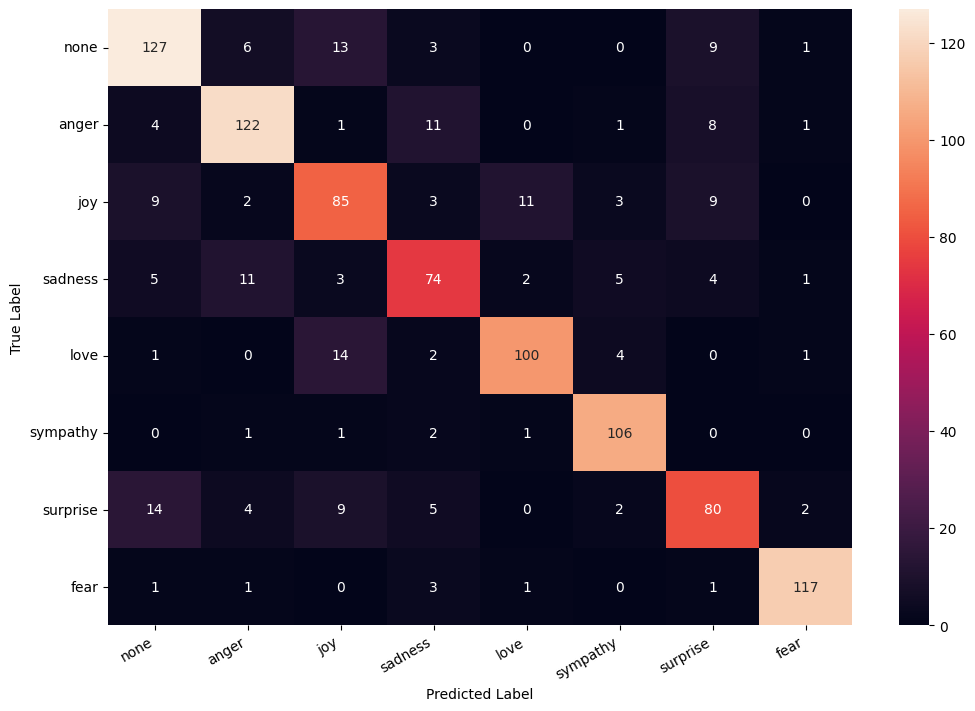

In [27]:
#Plot confusion matrix
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 8

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label');
cm = confusion_matrix(df_test.label,  ytest.indices)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

# Inference




MARBERT achieved the highest Accuacy between all the other BERT-based models. We evaluate it further by testing it on some tweets.

In [28]:
def test_model(my_input):
    import pandas as pd
    import seaborn as sns
    from matplotlib import rcParams
    rcParams['figure.figsize'] = 12, 8

    encoded_text = tokenizer.encode_plus(
      clean_text(my_input),
      return_tensors='pt',
    )

    input_ids = encoded_text['input_ids'].to(device)
    attention_mask = encoded_text['attention_mask'].to(device)
    output = bert_classifier(input_ids, attention_mask)
    _, prediction = torch.max(output, dim=1)

    print(f'tweet text: {my_input}')
    print(f'Emotion  : {class_names[prediction]}')
    print(" ")

#     pred_df = pd.DataFrame({
#       'class_names': class_names,
#       'values': output.detach().cpu().numpy()[0]
#     })

#     sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
#     plt.ylabel('Emotion')
#     plt.xlabel('probability')
#     plt.xlim([0, 3]);

In [29]:
test_model("انهارده شوفت النتيجة والممجموع ماعجبنيش")

tweet text: انهارده شوفت النتيجة والممجموع ماعجبنيش
Emotion  : sadness
 


In [30]:
test_model("انهارده شوفت النتيجة والممجموع كان كبير")

tweet text: انهارده شوفت النتيجة والممجموع كان كبير
Emotion  : joy
 


In [31]:
test_model("انهارده شوفت النتيجة والممجموع كان قليل")

tweet text: انهارده شوفت النتيجة والممجموع كان قليل
Emotion  : surprise
 


In [43]:
test_model("انهارده شوفت النتيجة والممجموع كان ابن لذينة 😡")

tweet text: انهارده شوفت النتيجة والممجموع كان ابن لذينة 😡
Emotion  : anger
 


In [39]:
test_model("شوفت صاحبي امبارح وحالته كانت صعبه")

tweet text: شوفت صاحبي امبارح وحالته كانت صعبه
Emotion  : sympathy
 


In [34]:
test_model("خايف جدا من النتيجة من ساعة ما خلصت امتحانات")

tweet text: خايف جدا من النتيجة من ساعة ما خلصت امتحانات
Emotion  : fear
 


## Saving BERT Model and Tokenizer

This code segment defines a function `save_model` to save the trained BERT classifier model and its corresponding tokenizer for future use.

### Saving Process:

1. **Model State Dict:**
   - The state dictionary of the BERT classifier model (`model.state_dict()`) is saved to the specified model path (`model_path`) using PyTorch's `torch.save` function.

2. **Tokenizer Serialization:**
   - The tokenizer object is serialized using Python's `pickle.dump` function and saved to the specified tokenizer path (`tokenizer_path`).

### Usage:

After defining the function `save_model`, you can call it with the trained BERT classifier model (`bert_classifier`), the tokenizer object (`tokenizer`), and the desired paths for saving the model and tokenizer. Upon execution, the model and tokenizer will be saved to the specified paths for future use, such as model deployment or further experimentation.

In [44]:
import torch
import pickle

def save_model(model, tokenizer, model_path, tokenizer_path):
    # Save the model
    torch.save(model.state_dict(), model_path)

    # Save the tokenizer
    with open(tokenizer_path, 'wb') as f:
        pickle.dump(tokenizer, f)

# Example paths where you want to save the model and tokenizer
model_path = 'bert_classifier_model.pth'
tokenizer_path = 'tokenizer.pkl'

# Save the model and tokenizer
save_model(bert_classifier, tokenizer, model_path, tokenizer_path)
